# Natural Language Process - Celebrity Interviews Project Part 2

For Part 2 of this Project, we use advanced NLP techniques that are designed for analysing Texual data

**The project Objectives of Part 2 of this project :**

**1. Sentiment analysis**

i) We want to identify which interviews are considered to have either strongly positive or negative sentiments. This will help to prioritise such interviews for example Interview text that consists of negative sentiments and understand what was talked about by the interviewers.


In [45]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# pip install -U textblob python -m textblob.download_corpora
from textblob import TextBlob

# 1. Sentiment analysis

1. Input  - a corpus. We do not use the DTM because order of words matters. i.e. "great" = +ve. "not great" = -ve

2. Method - Use Text Blob library (library for processing text-based information and perform basic NLP tasks)

3. Output - Sentiment score (how positive or negative are they) and subjectivity score (how opinionated are they)

In [46]:
# import dataset 

import pickle 
with open("outputs/tokenised_data.pkl", "rb") as fp:
    Interview_data = pickle.load(fp)

In [47]:
# revise data
Interview_data.head()

,Name,Profession,Origional Text,Tokenised Text,Preprocessed Text
0,Alvaro Morata,Footballer,in spain all the children played football esp...,"[spain, children, played, football, especially...",spain children played football especially scho...
1,Anna Petryk,Footballer,didnt want to change my team but the situati...,"[want, change, team, situation, made, russia, ...",want change team situation made russia invaded...
2,Ben Chilwell,Footballer,must admit when walked into the store was ...,"[must, admit, walked, store, little, nervous, ...",must admit walked store little nervous many pe...
3,Bruno Fernandes,Footballer,you could feel it between us between the fans...,"[could, feel, fans, atmosphere, like, getting,...",could feel fans atmosphere like getting back p...
4,Cesar Azpilicueta,Footballer,when arrived here wanted to become an impor...,"[arrived, wanted, become, important, player, c...",arrived wanted become important player club ob...


In [48]:
# example of sentiment analysis
TextBlob("I love PyOhio").sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

*i.e LOVE is an opinionated word and hence subjectivity is higher*

In [49]:
# use lambda function to find polarity and subjectivity of each routine
# We read from the actual corpus 'Origional Text' that has all the words in order

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

Interview_data['polarity'] = Interview_data['Origional Text'].apply(pol)
Interview_data['subjectivity'] = Interview_data['Origional Text'].apply(sub)


In [50]:
# view data with new columns polarity and subjectivity
Interview_data.head(3)

,Name,Profession,Origional Text,Tokenised Text,Preprocessed Text,polarity,subjectivity
0,Alvaro Morata,Footballer,in spain all the children played football esp...,"[spain, children, played, football, especially...",spain children played football especially scho...,0.346131,0.575137
1,Anna Petryk,Footballer,didnt want to change my team but the situati...,"[want, change, team, situation, made, russia, ...",want change team situation made russia invaded...,0.190439,0.578258
2,Ben Chilwell,Footballer,must admit when walked into the store was ...,"[must, admit, walked, store, little, nervous, ...",must admit walked store little nervous many pe...,0.245176,0.545114


In [51]:
# basic EDA for polarity
Interview_data.polarity.describe()

count    48.000000
mean      0.207033
std       0.063639
min       0.013779
25%       0.168983
50%       0.203804
75%       0.248256
max       0.346131
Name: polarity, dtype: float64

In [52]:
# basic EDA for subjectivity
Interview_data.subjectivity.describe()

count    48.000000
mean      0.510883
std       0.040936
min       0.401713
25%       0.486243
50%       0.502524
75%       0.545421
max       0.578258
Name: subjectivity, dtype: float64

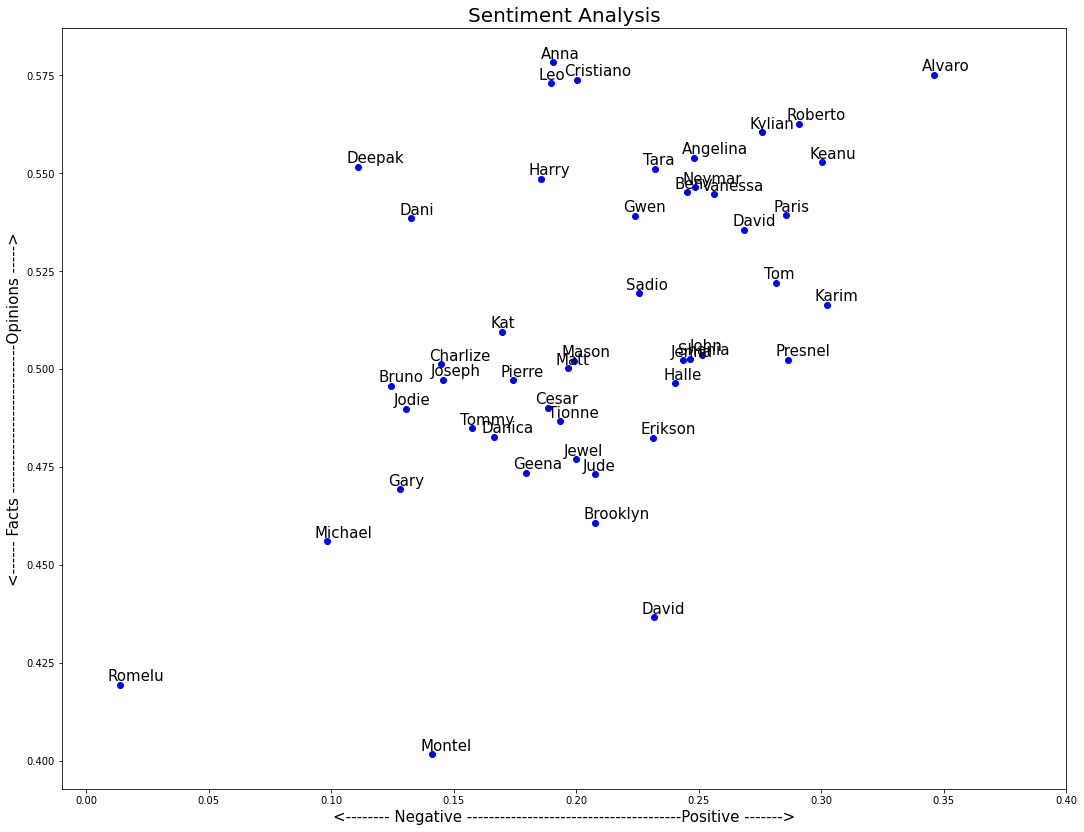

In [53]:
# Plot the results
plt.rcParams['figure.figsize'] = [18,14]

for i, celebrity in enumerate(Interview_data.index):
    x = Interview_data.polarity.loc[celebrity]
    y = Interview_data.subjectivity.loc[celebrity]
    
    plt.scatter(x, y, color='blue')
    plt.text(x-0.005, y+0.001,Interview_data['Name'][i].split()[0], fontsize=15)
    plt.xlim(-0.01, 0.40)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-------- Negative ---------------------------------------Positive ------->', fontsize=15)
plt.ylabel('<------ Facts ---------------------------Opinions ----->', fontsize=15)

plt.show()

# Sentiment of Routine during the Interview

Here we want to check sentiment over the course of the entire interview for each celebrity. So we will divide each interview text into 10 different folds of texts and run the TextBlob on these 10 pieces of texts for each Celeberity. This will be able to bring insight into how the Celebrity sentiments changed during the course of the interview.

In [54]:
# function that split interview texts into 10 different texts
def split_text(text, n=10):
    '''Takes a string of text and splits it into n equal parts, with a default of 10 equal parts'''
    
    length = len(text)   # Calculate length of text and put it into a list
    size = math.floor(length/n) # get size of interview piece by splitting interview into n folds
    start = np.arange(0,length, size)
    
    # pull out equally sized pieces of text and put into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [55]:
# create a list to hold all pieces of text
list_pieces = []
for t in Interview_data['Origional Text']:
    # apply the function so that output is a list of each interview
    split = split_text(t)
    list_pieces.append(split)

# sample of how interview texts are divided into 10 fold pieces - for Kylian Mbappe
n = 1
for i in list_pieces[15]:
    print(f'Text {n} --> {i}')
    print('-'*80)
    n+=1

Text 1 -->  were really happy to have qualified and scoring four goals here at the parc des princes is special for me because its my stadium im always happy to play here but the most important thing is that weve qualified becau
--------------------------------------------------------------------------------
Text 2 --> se we wanted it and we deserved it  think what happened to me this summer has shaped me to have taken hit after hit with that decisive missed penalty and my non-transfer it tests your mentality and your limits  respo
--------------------------------------------------------------------------------
Text 3 --> nded in the best way possible it reinforced me and now im more confident than  was before all the while staying humble and determined to do great things this season  dont know if [my comments] were liberating  hadnt 
--------------------------------------------------------------------------------
Text 4 --> had  full pre-season but then its true that getting it all off

In [56]:
# Calculate polarity for each piece of Text

polarity_transcript = []
for celebrity_interview in list_pieces:
    polarity_piece = []
    for piece_interview in celebrity_interview:
        polarity_piece.append(TextBlob(piece_interview).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

# sample polarity for some text
polarity_transcript[1]

[0.09000000000000001,
 0.32222222222222235,
 0.0,
 0.0709090909090909,
 -0.2866666666666666,
 0.37007575757575756,
 0.4887878787878788,
 -0.18229166666666666,
 0.20142857142857143,
 0.06666666666666667]

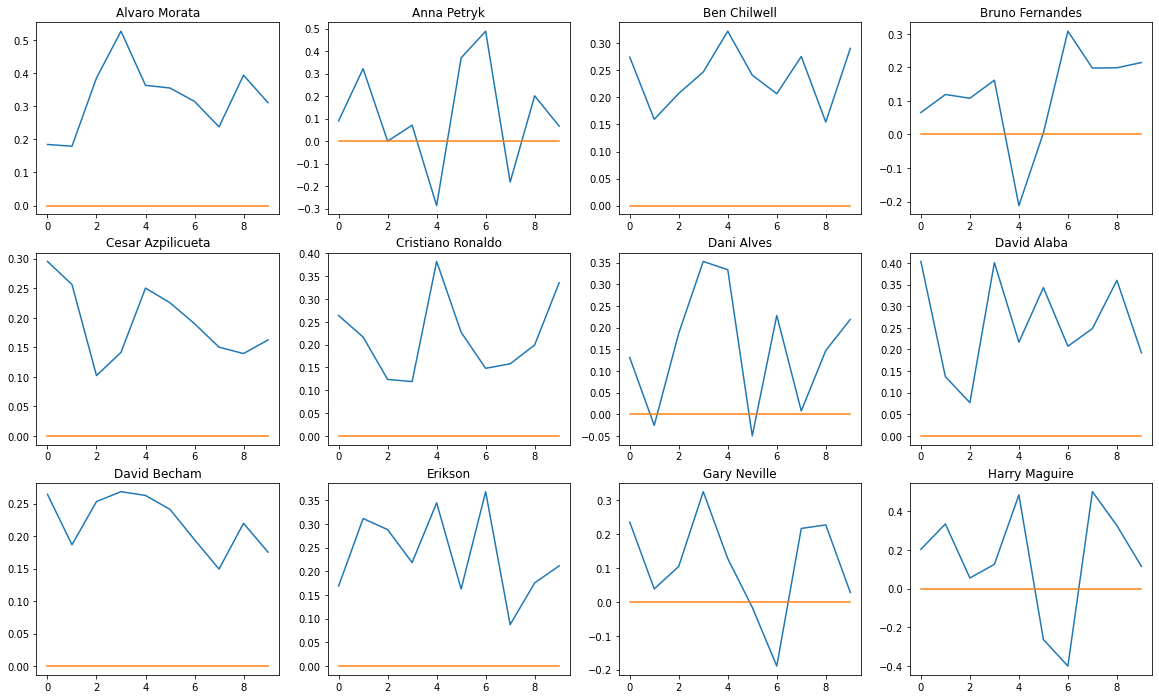

In [57]:
# show graphs of sentiments for FOOTBALLERS
plt.rcParams['figure.figsize'] = [20,12]
for i, celebrity in enumerate(Interview_data.index[0:12]):
    plt.subplot(3,4, i+1)
    plt.plot(polarity_transcript[i])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(Interview_data['Name'][i])
    
plt.show()

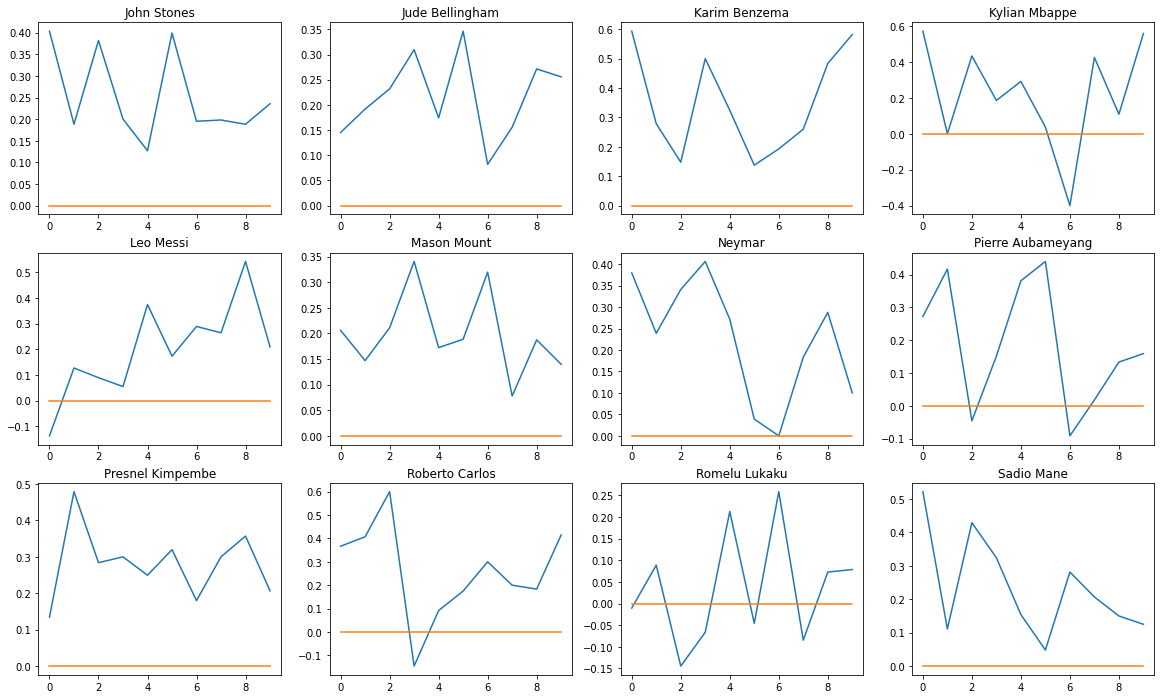

In [58]:
# show graphs of sentiments for FOOTBALLERS
for i, celebrity in enumerate(Interview_data.index[12:24]):
    plt.subplot(3,4, i+1)
    plt.plot(polarity_transcript[i+12])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(Interview_data['Name'][i+12]) 

plt.show()

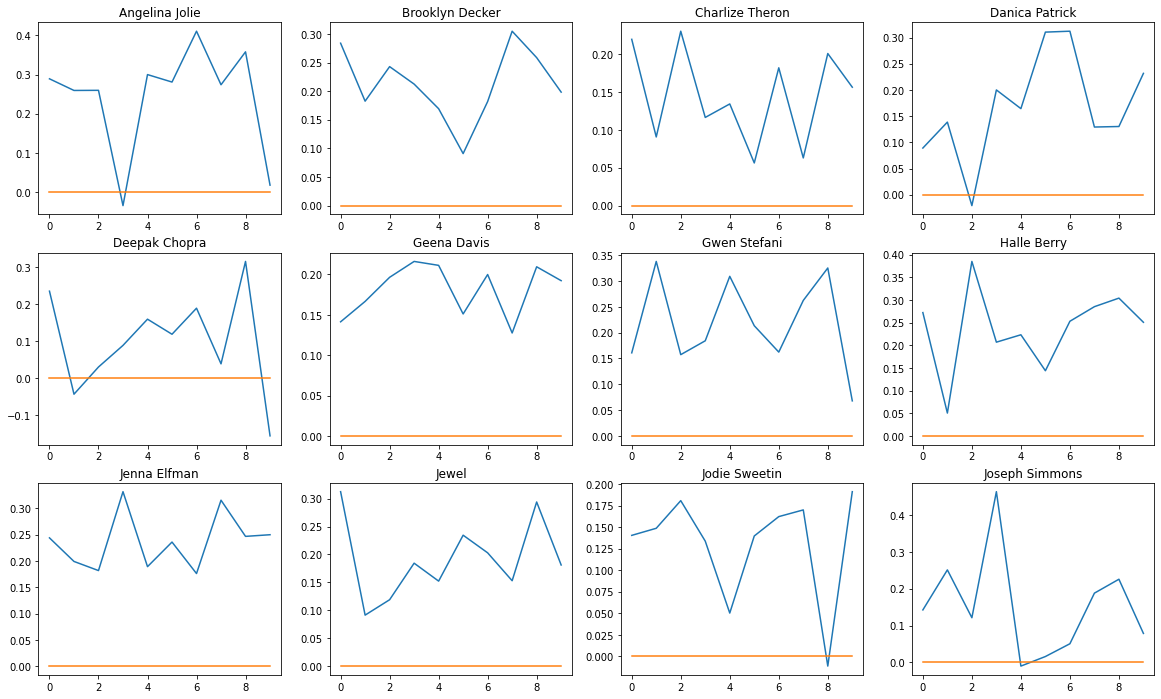

In [59]:
# show graphs of sentiments for HOLLYWOOD CELEBRITIES
for i, celebrity in enumerate(Interview_data.index[24:36]):
    plt.subplot(3,4, i+1)
    plt.plot(polarity_transcript[i+24])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(Interview_data['Name'][i+24])   

plt.show()

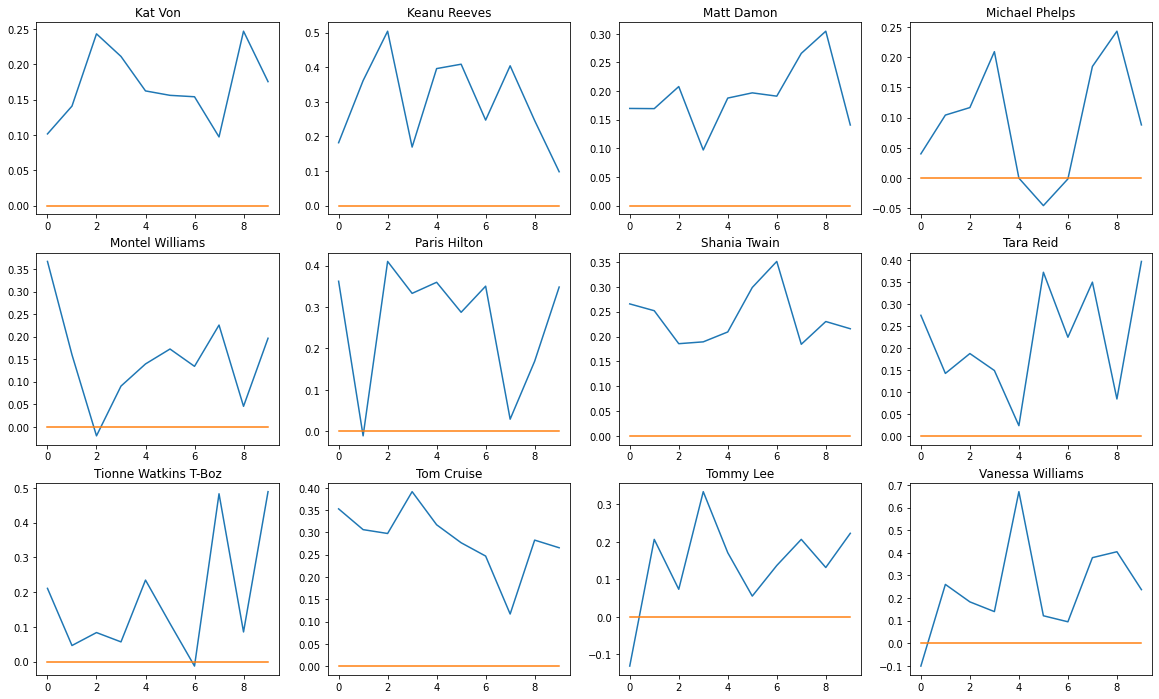

In [60]:
# show graphs of sentiments for HOLLYWOOD CELEBRITIES
for i, celebrity in enumerate(Interview_data.index[36:48]):
    plt.subplot(3,4, i+1)
    plt.plot(polarity_transcript[i+36])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(Interview_data['Name'][i+36])

plt.show()

# POSITIVE SENTIMENT (POLARITY) INTERVIEW TEXT

## 1. Lionel Messi Text Analysis

In [35]:
split_text(Interview_data['Origional Text'][16])[8]

'r makes the group what it is today the time with maradona as coach was spectacular we arrived at the world cup suffering but  think the whole process was very nice even though it ended the way it did it was very good for him too the way he enjoyed being with us the day to day brazil have great players they have ney they have  good team for the world cup despite the injuries  think france have  great team for the world cup we didnt have many clashes against european teams  think were in  good moment but we must not fall into the error of peoples madness and believe were favourites to win the world cup we have to be realistic and take it step by step spain is  team that is very clear about their style they make you run they get the ball out and they have players with  lot of quality spain have  lot of it and th'

## 2. Alvaro Morata Text Analysis

In [36]:
split_text(Interview_data['Origional Text'][0])[3]

'of the right platforms in place for us to be happy but as long as were together were always happy wherever we are its great to try new experiences and new lifestyles we love to explore walk and visit all of the best restaurants in new cities its  great feeling to return to juventus  always felt attached to the club and im very happy here when you are in  place that feels like home there is always  hunger to return the first spell was great but  am convinced im now  better player and that  have grown up in many aspects of my life so im sure this will be another incredible journey  will always be ready to'

## 3. Tom Cruise Text Analysis

In [37]:
split_text(Interview_data['Origional Text'][45])[3]

'his it was emotional and it was something that look im very grateful because its not easy to try to figure out for an audience and deliver because  want to deliver for them  love entertaining an audience and  love learning and pushing all of my skills as  storyteller and an actor also the beauty of making  movie is its not me its us together its the accumulation of talent and knowing how to discover and bring that talent together and everyone shines thats the dream and then an audience will go and appreciate it and the kind of reaction that weve gotten  just want people to be happy and  want them to feel like yes first of all its just  relief because making it was daunting for  years and people wanting to see this film and youre going ok how do we do this how do we capture lightening in  bottle in that way again when people are saying that im just so happy for them  made it for audiences for everyone to just go and have  great time at the cinema you know when people see the film findi

## 4. Vanessa Williams Text Analysis


In [66]:
split_text(Interview_data['Origional Text'][47])[4]

'thing like that love  love like that never ends once theyre out of the house youre still as  mom always available youre still always worried laughs and concerned and youre still always extremely proud no matter their age or what they are doing my feel good is waking up with  good cup of coffee and doing  crossword puzzle in the sun that starts my day off perfectly and when  get  chance to explore and travel  love to horseback ride wherever  am and go to the stables and find  horse and go on an adventure and explore the terrain on horseback spending time at home is also  joy for me im on the road traveling so much so my happy place is kicking off my shoes and hanging out at home  hmm… it depends on what it is  pray to god and my ancestors and my guides and everyone who has been with me al'

# Analysis for Negative Sentiments.  


Leo Messi talks about his experience with Maradona in 2014 World cup. He also talks about Brazil, France and Spain that they had good players 2022 world cup in qatar.

Alvaro Morata talks about how happy he is to return to Juventus. How he enjoys new experiences, new lifestyles and visiting all of the best restaurants in new cities.

Tom Cruise talks about how grateful he is about Maverick (movie) and that he loves entertaining an audience, the beauty of making movie and that he just want people to be happy.

Vanessa Williams talks about love for her kids, being a mom and spending time at home. Also talks about how she loves horseback rides when travelling.


# NEGATIVE SENTIMENT (POLARITY) INTERVIEW TEXT

## 1. Romelu Lukaku Text Analysis

In [43]:
split_text(Interview_data['Origional Text'][22])[2]

'd we should just sit around the table and have  big meeting about it how we can attack it straight away not only from the mens game but also from the womens game  think just all of us together and just have  big meeting and have  conference and just talk about stuff that needs to be addressed to protect the players but also to protect fans and younger players that want to become professional footballers lukaku was speaking to cnn sport around the launch of chelseas no to hate photography competition which is encouraging fans of the club around the world to send in their photos that show the diversit'

## 2. Anna Petryk Text Analysis  

In [40]:
split_text(Interview_data['Origional Text'][1])[3:5]

['rainians but  can see and  am rejoicing that my nation tries to continue to live those few months are very changing for my life for my family and friends people live one day at  time nobody knows what may happen tomorrow or the day after tomorrow were trying to live today and enjoy this one day  have mixed feelings im very happy  can play football in ukraine even though the war is going on but its very terrible when we are playing football and we hear the air raid siren and we have to go to the shelter ',
 'and wait we can wait twenty minutes or one or even two hours we played against scotland and hungary in june it was the fourth month of the war when the war started we tried to find  team and after that we tried to adapt in the team then we tried not to think about terrible things in ukraine we tried to concentrate on football because we knew we had two official games for the national team and it was very important for us and our country we wanted to play in ukraine but it was impo

## 3. Michael Phelps Text analysis

In [41]:
split_text(Interview_data['Origional Text'][39])[5]

't  was meant to do in this sport for the longest time  saw myself as strictly  swimmer and just this kid who went up and down staring at  black line [in  swimming pool] and not  human being thats that feeling of trading happiness for greatness you are referring to  didnt like who  saw in the mirror when  was like that no because  just wanted it that bad it was always more of  wanting and  striving going into  that was just… me when  become super focused on one thing its that and only that im  competitor and im the biggest competitor you will ever see its that blood in the water mentality at that point in my life when  wanted something bad enough  was going to outwork every single human being no matter what it took  today meaning over the last couple of months laughs  will say this  did  piece with espn three months ago and it was  disaster yes  have ridden  roller coaster of emotions over the last six months as im sure we all have but all in all honestly today  dont think  could be in

## 4. Tionne Watkins T-Boz Text Analysis

In [42]:
split_text(Interview_data['Origional Text'][44])[6]

'es out and says  dont even know how shes doing this because  didnt do it…  used to always wonder why  got through things like why  lived and why my cousin died and why we had the same disease  used to wonder why im here and what my purpose was then not so long ago maybe the last seven to eight years  figured my purpose here was to help people whether its through music or through sharing my testimony and being  ray of hope for someone ive also learned to push past my fears  used to hate speaking in front to people ive learned to face my fears and ive learned that im an open book and  like to learn… about people about things… it just makes me more of  people person so that  can better help someone else  yes when  talk'

# Analysis for Negative Sentiments. 

Anna Petryk talks about the difficulty of playing football in Ukraine during war and she mentions that they could hear siren and bombs during a match and they had to look for shelter.

Romelu Lukaku talks about diversity and Chelseas No To Hate photography competition and how both footballers and fans should be protected from such.

Michael Phelps talks about his fustration on how his career ended in swimming and how badly he wanted to be a superstar. He also talks about his roller coaster of emotions and his experience in quarantine.

Tionne Watkins talks about death of her cousin, and that they had the same disease. She also talks about helping people through music or through sharing her testimony

# Conclusion on Sentiments Analysis

The results of Sentiment Analysis make sense. We picked 4 Positive and 4 Negative sentiments from foootballers and Hollywood Celebrities interviews to read through what the *Text Blob Library* considered as Positive and Negative texts within the interview period. This analysis allowed us to understand the sentiment of celebrities during the course of their interview.

Also it is easy for us to identify which specific parts of the interview, the celebrity was strongly Positive or Negative based on Polarity score [-1,1].

Sentiment Analysis for this particular project can be used by anyone who may be looking for some story to write or research further about these celebrities. Visualisation of texts using the wordcloud also helps to give clues of what sort of interesting story was talked about in the interview.